In [1]:
import copy
import numpy as np
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import galaxy_dive.read_data.metafile as read_metafile
import galaxy_dive.plot_data.plotting as plotting
import galaxy_dive.utils.utilities as utilities
import galaxy_dive.utils.executable_helpers as exec_helpers

In [4]:
import linefinder.utils.file_management as file_management
import linefinder.analyze_data.worldline_set as worldline_set
import linefinder.analyze_data.worldlines as worldlines
import linefinder.utils.presentation_constants as p_constants
import linefinder.config as l_config

/home1/03057/zhafen/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import analysis_config

In [6]:
import colossus.cosmology.cosmology as co_cosmology

# Load Data

In [7]:
snum, galdef = exec_helpers.choose_config_or_commandline(
    [ analysis_config.SNUM, analysis_config.GALDEF ]
)
print( 'Using snum {}, galdef {}'.format( snum, galdef ) )

Using snum 172, galdef _galdefv3


In [8]:
presentation_figure = False

In [30]:
mass_key = 'enriched_metal_mass'

In [10]:
save_file_tags = {
    'M' : 'mass',
    'metal_mass' : 'metalmass',
    'enriched_metal_mass' : 'enrichedmetalmass',
}

In [11]:
axes_labels = {
    'M' : 'Mass',
    'metal_mass' : 'Metal Mass',
    'enriched_metal_mass' : 'Metal Mass',
}

In [12]:
file_manager = file_management.FileManager( project='CGM_fate' )

In [13]:
ind = 600 - snum

In [14]:
tag_tail = '_CGM_snum{}'.format( snum )

In [15]:
defaults, variations = file_manager.get_linefinder_analysis_defaults_and_variations(
    tag_tail,
    sim_names = analysis_config.SIM_NAMES,
    galdef = galdef,
)
defaults, variations

({'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m12i_res7100/data',
  'halo_data_dir': '/scratch/03057/zhafen/core/m12i_res7100/halo',
  'ids_tag': 'm12i_CGM_snum172',
  'main_halo_id': 0,
  'ptracks_tag': 'm12i_CGM_snum172',
  'tag': 'm12i_CGM_snum172_galdefv3'},
 {'m10q': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10q_res250/data',
   'halo_data_dir': '/scratch/03057/zhafen/core/m10q_res250/halo',
   'ids_tag': 'm10q_CGM_snum172',
   'main_halo_id': 0,
   'ptracks_tag': 'm10q_CGM_snum172',
   'tag': 'm10q_CGM_snum172_galdefv3'},
  'm10y': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10y_res250/data',
   'halo_data_dir': '/scratch/03057/zhafen/core/m10y_res250/halo',
   'ids_tag': 'm10y_CGM_snum172',
   'main_halo_id': 0,
   'ptracks_tag': 'm10y_CGM_snum172',
   'tag': 'm10y_CGM_snum172_galdefv3'},
  'm10z': {'ahf_index': 600,
   'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m

In [16]:
w_set = worldline_set.WorldlineSet( defaults, variations )

In [17]:
default_sim_name = w_set.keys()[0]

In [18]:
w = w_set[default_sim_name]

In [19]:
classifications = p_constants.CLASSIFICATIONS_CGM_FATE
# classifications.append( 'is_in_CGM' )

In [20]:
metafile_reader = read_metafile.MetafileReader(
    file_manager.get_metafile_dir( default_sim_name )
)

# Analyze Data

### Get masses out

In [31]:
w_set.data_object.data_masker.clear_masks()

SmartDict, {
'm10q' : None,
'm11e_md' : None,
'm10z' : None,
'm11v' : None,
'm11q' : None,
'm10y' : None,
'm12r_md' : None,
'm12f' : None,
'm11i_md' : None,
'm11h_md' : None,
'm12m' : None,
'm11a' : None,
'm12i' : None,
'm11c' : None,
'm11b' : None,
'm12b_md' : None,
'm12z_md' : None,
'm12w_md' : None,
'm11d_md' : None,
'm12c_md' : None,
}

#### Mass Fractions

In [32]:
CGM_mass_fractions = w_set.get_categories_selected_quantity_fraction(
    normalization_category = 'is_in_CGM',
    selection_routine = 'ptype',
    ptype = 'gas',
    classification_list = classifications,
    sl = (slice(None),ind),
    selected_quantity_data_key = mass_key,
)

Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in plotting object. Checking data object.
Attribute get_categories_selected_quantity_fraction not found in

In [33]:
CGM_mass_fractions = CGM_mass_fractions.transpose()

#### Halo Masses

In [34]:
halo_masses = w_set.m_vir.inner_item( snum )

Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Checking data object.
Attribute m_vir not found in plotting object. Ch

### Turn Data into Smart Dictionaries

In [35]:
for key, item in copy.deepcopy( CGM_mass_fractions ).items():
    CGM_mass_fractions[key] = utilities.SmartDict( item )

# Plot Data

## Setup

In [36]:
mass_range = [ halo_masses.array().min()/1.5, halo_masses.array().max()*1.5 ]
mass_range

[2128955365.6220324, 816350427350.4275]

In [37]:
m_vir_md_split = halo_masses.split_by_key_slice( slice(4,10), '_md' )
m_vir_fiducials = m_vir_md_split[False]
m_vir_mds = m_vir_md_split[True]

In [38]:
def save_plot_stage( fig, base_save_file, index ):

    save_file = '{}.{}.pdf'.format( base_save_file, index )
    
    plotting.save_fig(
        out_dir = file_manager.get_project_presentation_dir(),
        save_file = save_file,
        fig = fig,
    )
    
    return index + 1

## Mass Fraction Plot

File saved at /home1/03057/zhafen/papers/CGM_fate/figures/CGM_enrichedmetalmass_frac_vs_Mh_CGM_snum172.pdf


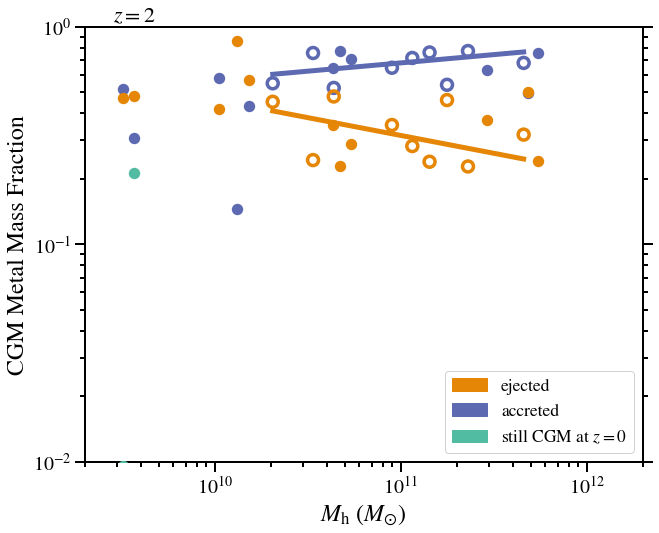

In [39]:
fig = plt.figure( figsize=(10,8), facecolor='w' )
ax = plt.gca()

# Some plot settings
if key != 'M':
    y_min = 1e-2
else:
    y_min = 8e-4
y_max = 1
alpha = 1.0

# Plot data points
color_objects = []
labels = []
j = 0
for k, classification in enumerate( classifications ):
    
    if presentation_figure:
                
        j = save_plot_stage( fig, 'CGM_{}_frac_vs_Mh{}'.format( save_file_tags[mass_key], tag_tail ), j )
    
    if classification == 'is_in_CGM':
        continue
        
    item = CGM_mass_fractions[classification]
    
    md_split = item.split_by_key_slice( slice(4,10), '_md' )
    fiducials = md_split[False]
    mds = md_split[True]
    
    edgecolor = np.array( matplotlib.colors.colorConverter.to_rgba(
        l_config.COLORSCHEME[classification]
    ) )
    edgecolor[-1] = alpha
        
    # Default points
    ax.scatter(
        m_vir_fiducials.array(),
        fiducials.array(),
        s = 130,
        color = None,
        zorder = 100 - k,
        linewidth = 0,
        facecolors = l_config.COLORSCHEME[classification],
        alpha = alpha,
    )
    
    if mass_key != 'M':
        facecolors = 'none'
        color = edgecolor
    else:
        facecolors = l_config.COLORSCHEME[classification]
        color = 'none'
        
    # Turbulent metal diffusion
    ax.scatter(
        m_vir_mds.array(),
        mds.array(),
        s = 120,
        color = color,
        marker = 'o',
        zorder = 100 - k,
        facecolors = facecolors,
        linewidth = 3.5,
        alpha = alpha,
    )
    
    # Box plot
    if mass_key != 'M':
        x_data = m_vir_mds
        y_data = mds
    else:
        x_data = halo_masses
        y_data = item
    x_datas = x_data.split_by_dict( l_config.MASS_BINS, return_list=True )
    y_datas = y_data.split_by_dict( l_config.MASS_BINS, return_list=True )
    plotting.box_plot(
        x_datas,
        y_datas,
        ax = ax,
        color = l_config.COLORSCHEME[classification],
        box_zorder = 50 - k,
        blank_zorder = 30 - k,
        line_zorder = 10 - k,
#         linewidth = 7 - k,
        linewidth = 5,
        y_floor = 1e-5,
        plot_boxes = False,
        line_x_min = x_data.array().min(),
        line_x_max = x_data.array().max(),
        y_mean_statistic = np.median,
    )
    
    if classification is not None:
        # Make virtual artists to allow a legend to appear
        color_object = matplotlib.patches.Rectangle(                         
            (0, 0),                                                          
            1,                                                               
            1,                                                               
            fc = l_config.COLORSCHEME[classification],                                 
            ec = l_config.COLORSCHEME[classification],                                 
            alpha = p_constants.CLASSIFICATION_ALPHA,                        
        )
        color_objects.append( color_object )                                 
        labels.append( p_constants.CLASSIFICATION_LABELS[classification] )

    # Add a redshift label
    if k == 0:
        redshift_label = r'$z=' + '{:.02g}'.format( w.data_object.redshift[snum] ) + '$'
        ax.annotate( s=redshift_label, xy=(0.05,1.0125), xycoords='axes fraction', fontsize=22 )

    if snum == 172:
        ax.set_xlabel( r'$M_{\rm h}$ ($M_{\odot}$)', fontsize=24 )
    ax.set_ylabel( r'CGM {} Fraction'.format( axes_labels[mass_key] ), fontsize=24 )

    ax.set_xlim( 2e9, 2e12 )
    ax.set_ylim( y_min, y_max )

    ax.set_xscale( 'log' )
    ax.set_yscale( 'log' )
    
    # Add ticks to the righ
    ax.yaxis.set_ticks_position( 'both' )

    if snum == 172:
        legend = ax.legend(
            color_objects,
            labels,
            prop={'size': 17.5},
            ncol=1,
            loc='lower right',
            fontsize=24,
            framealpha = 0.9,
        )
        legend.set_zorder( 120 )

save_file = 'CGM_{}_frac_vs_Mh{}.pdf'.format( save_file_tags[mass_key], tag_tail )

plotting.save_fig(
    out_dir = file_manager.get_project_figure_dir(),
    save_file = save_file,
    fig = fig,
)

# Mass Analysis

import os

import py2tex.py2tex as py2tex

tex_filepath = os.path.join( file_manager.project_parameters['project_dir'], 'variables.tex' )

tex_file = py2tex.TeXVariableFile( tex_filepath )

# Used for variable names
if snum == 465:
    regime = 'low'
if snum == 172:
    regime = 'high'

### IGM Accretion

if mass_key == 'M':
    nep = utilities.SmartDict( CGM_mass_fractions['is_CGM_NEP'] )

    nep_mean = nep.array().mean()

    tex_file.save_variable(
        'fracnepmean{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean, 5, nearest_base=True ),
    )

    sub_nep = nep.split_by_dict( l_config.MASS_BINS )

    for mass_bin, name in zip( ['m10', 'm11', 'm12' ], ['dwarf', 'subMW', 'MW'] ):
        nep_mean = sub_nep[mass_bin].array().mean()

        tex_file.save_variable(
            'fracnep{}mean{}'.format( name, regime ),
            py2tex.to_tex_percentage( nep_mean, 5, False, nearest_base=True ),
        )

if mass_key == 'enriched_metal_mass':
    
    nep = CGM_mass_fractions['is_CGM_NEP']
    
    nep_split = nep.split_by_key_slice( slice(4,10), '_md' )
    nep_f = nep_split[False]
    nep_md = nep_split[True]
    
    nep_mean = nep_f.array().mean()    
    tex_file.save_variable(
        'fracnepmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean, 1, False ),
    )
    
    nep_mean_md_m12 = nep_md.split_by_dict( l_config.MASS_BINS )['m12'].array().mean()    
    tex_file.save_variable(
        'fracnepmetalmeanmdMW{}'.format( regime ),
        py2tex.to_tex_percentage( nep_mean_md_m12, 5, False, nearest_base=True ),
    )

### Wind

if mass_key == 'M':
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_IP'] )

    sub_wind = wind.split_by_dict( l_config.MASS_BINS )

    less_mass_wind_mean = 0.5*( sub_wind['m11'].array().mean() + sub_wind['m10'].array().mean() )

    tex_file.save_variable(
        'fraclessmasswindmean{}'.format( regime ),
        py2tex.to_tex_percentage( less_mass_wind_mean, 0 )
    )

    tex_file.save_variable(
        'fracMWwindmean{}'.format( regime ),
        py2tex.to_tex_percentage( sub_wind['m12'].array().mean(), 5, nearest_base=True )
    )

if mass_key == 'enriched_metal_mass':
    
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_IP'] )
    
    wind_split = wind.split_by_key_slice( slice(4,10), '_md' )
    wind_f = wind_split[False]
    wind_md = wind_split[True]
    
    tex_file.save_variable(
        'fracwindmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( wind.array().mean(), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( wind_md.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( wind_f.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedian{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind.array() ), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedianmd{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind_md.array() ), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracwindmetalmedianf{}'.format( regime ),
        py2tex.to_tex_percentage( np.median( wind_f.array() ), 5, False, nearest_base=True )
    )

### Satellite Wind

if mass_key == 'M':
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_EP'] )

    sub_wind = wind.split_by_dict( l_config.MASS_BINS )

    less_mass_wind_max = np.max( [sub_wind['m10'].array().max(), sub_wind['m11'].array().max(), ])

    tex_file.save_variable(
        'fraclessmasssatwindmax{}'.format( regime ),
        py2tex.to_tex_percentage( less_mass_wind_max, 5, nearest_base=True )
    )

    tex_file.save_variable(
        'fracMWsatwindmean{}'.format( regime ),
        py2tex.to_tex_percentage( sub_wind['m12'].array().mean(), 5, nearest_base=True )
    )

if mass_key == 'enriched_metal_mass':
    
    wind = utilities.SmartDict( CGM_mass_fractions['is_CGM_EP'] )
    
    wind_split = wind.split_by_key_slice( slice(4,10), '_md' )
    wind_f = wind_split[False]
    wind_md = wind_split[True]
    
    tex_file.save_variable(
        'fracsatwindmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( wind.array().mean(), 5, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracsatwindmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( wind_md.array().mean(), 5, False, nearest_base=True )
    )
    
    tex_file.save_variable(
        'fracsatwindmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( wind_f.array().mean(), 5, False, nearest_base=True )
    )

### Satellites

if mass_key == 'M':
    sat = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite'] )

    sub_sat = sat.split_by_dict( l_config.MASS_BINS )

    n_particles = w_set.items()[0][1].data_object.n_particles

    m10_min = np.max( [ sub_sat['m10'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracdwarfsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m10_min, 0 )
    )

    m11_min = np.max( [ sub_sat['m11'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracsubMWsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m11_min, 0 )
    )

    m12_min = np.max( [ sub_sat['m12'].array().min(), 1./n_particles ] )

    tex_file.save_variable(
        'fracMWsatmean{}'.format( regime ),
        py2tex.to_tex_scientific_notation( m12_min, 0 )
    )

if mass_key == 'enriched_metal_mass':
    
    sat = utilities.SmartDict( CGM_mass_fractions['is_CGM_satellite'] )
    
    sat_split = sat.split_by_key_slice( slice(4,10), '_md' )
    sat_f = sat_split[False]
    sat_md = sat_split[True]
    
    tex_file.save_variable(
        'fracsatmetalmean{}'.format( regime ),
        py2tex.to_tex_percentage( sat.array().mean(), 0 )
    )
    
    tex_file.save_variable(
        'fracsatmetalmeanmd{}'.format( regime ),
        py2tex.to_tex_percentage( sat_md.array().mean(), 0, False )
    )
    
    tex_file.save_variable(
        'fracsatmetalmeanf{}'.format( regime ),
        py2tex.to_tex_percentage( sat_f.array().mean(), 0, False )
    )